In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x])
print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
95,5.7,3.0,4.2,1.2,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
103,6.3,2.9,5.6,1.8,2,virginica
129,7.2,3.0,5.8,1.6,2,virginica
136,6.3,3.4,5.6,2.4,2,virginica


In [3]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

In [4]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)

In [26]:
model = tree.DecisionTreeClassifier(random_state= 1)
model.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
model.score(X_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

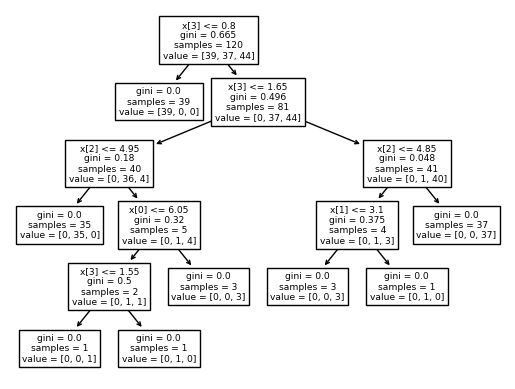

In [28]:
tree.plot_tree(model)

In [8]:
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Задача
Подобрать значения гиперпараметров модели criterion, max_depth, min_samples_leaf с помощью перебора по сетке.

In [9]:
X_train.shape

(120, 4)

Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 1
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 2
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 3
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 4
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 5
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 6
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное количество объектов: 7
Оценка качества модели: 0.5666666666666667
Параметры модели: метод - gini, количество уровней: 1, минимальное ко

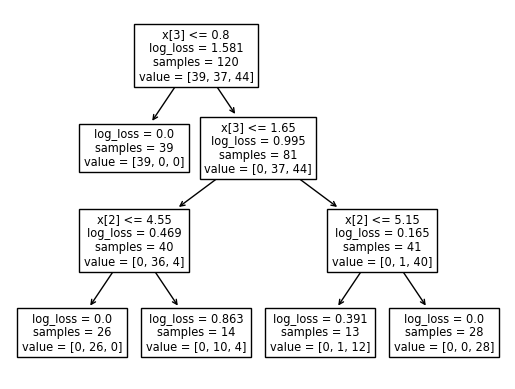

In [40]:
scores = []
for i in ['gini', 'entropy', 'log_loss']:
    for j in range(1, 4):
        for k in range(1, 14):
            model = tree.DecisionTreeClassifier(criterion=i, max_depth=j, min_samples_leaf=k, random_state=25)
            model.fit(X_train ,y_train)
            print('Параметры модели: метод - {}, количество уровней: {}, минимальное количество объектов: {}'.format(i, j, k))
            print('Оценка качества модели: {}'.format(model.score(X_test, y_test)))
            tree.plot_tree(model)